# Link Analysis
Conducting a link analysis of a network graph involves identifying and analyzing the link within the graph. 

In [6]:
import pandas as pd
import numpy as np
from os.path import join
import os


from dotenv import load_dotenv
load_dotenv()  

path = os.environ['DATA_DIRECTORY']
covalent_key = os.environ['COVALENTHQ_API_KEY']
df_snapshots = pd.read_csv('../data/snapshot_selection.csv')
df_tokens = pd.read_csv("../data/final_token_selection.csv")


In [7]:
import sys
sys.path.append('..') 

from src.analysis.link_analysis import * 
from src.visualisations.link_analysis_visualisations import * 

## Create dataframes for each metrics

In [8]:
import pickle

# Specify the path to the file containing the saved cliques data
links_data_path = join(path, '../data/links_data_class.pkl')
links_data = LinkData(links_data_path)


# Use the metric_names attribute from CliquesData
metric_names = links_data.metric_names


# Initialize an empty dictionary to store DataFrames for each metric
metric_dataframes = {'sample': {},'control': {},'pvalues': {}, 'sample_directional':{}, 'control_directional':{}, 'pvalues_directional':{}}

# Create DataFrames for each metric
for group in ['sample', 'control', 'pvalues', 'sample_directional', 'control_directional', 'pvalues_directional']:
    for metric_name in metric_names:
        metric_dataframes[group][metric_name] = links_data.get_metric_data(group, metric_name)
        

## Figure Generation

### Fig: Size of Clique 

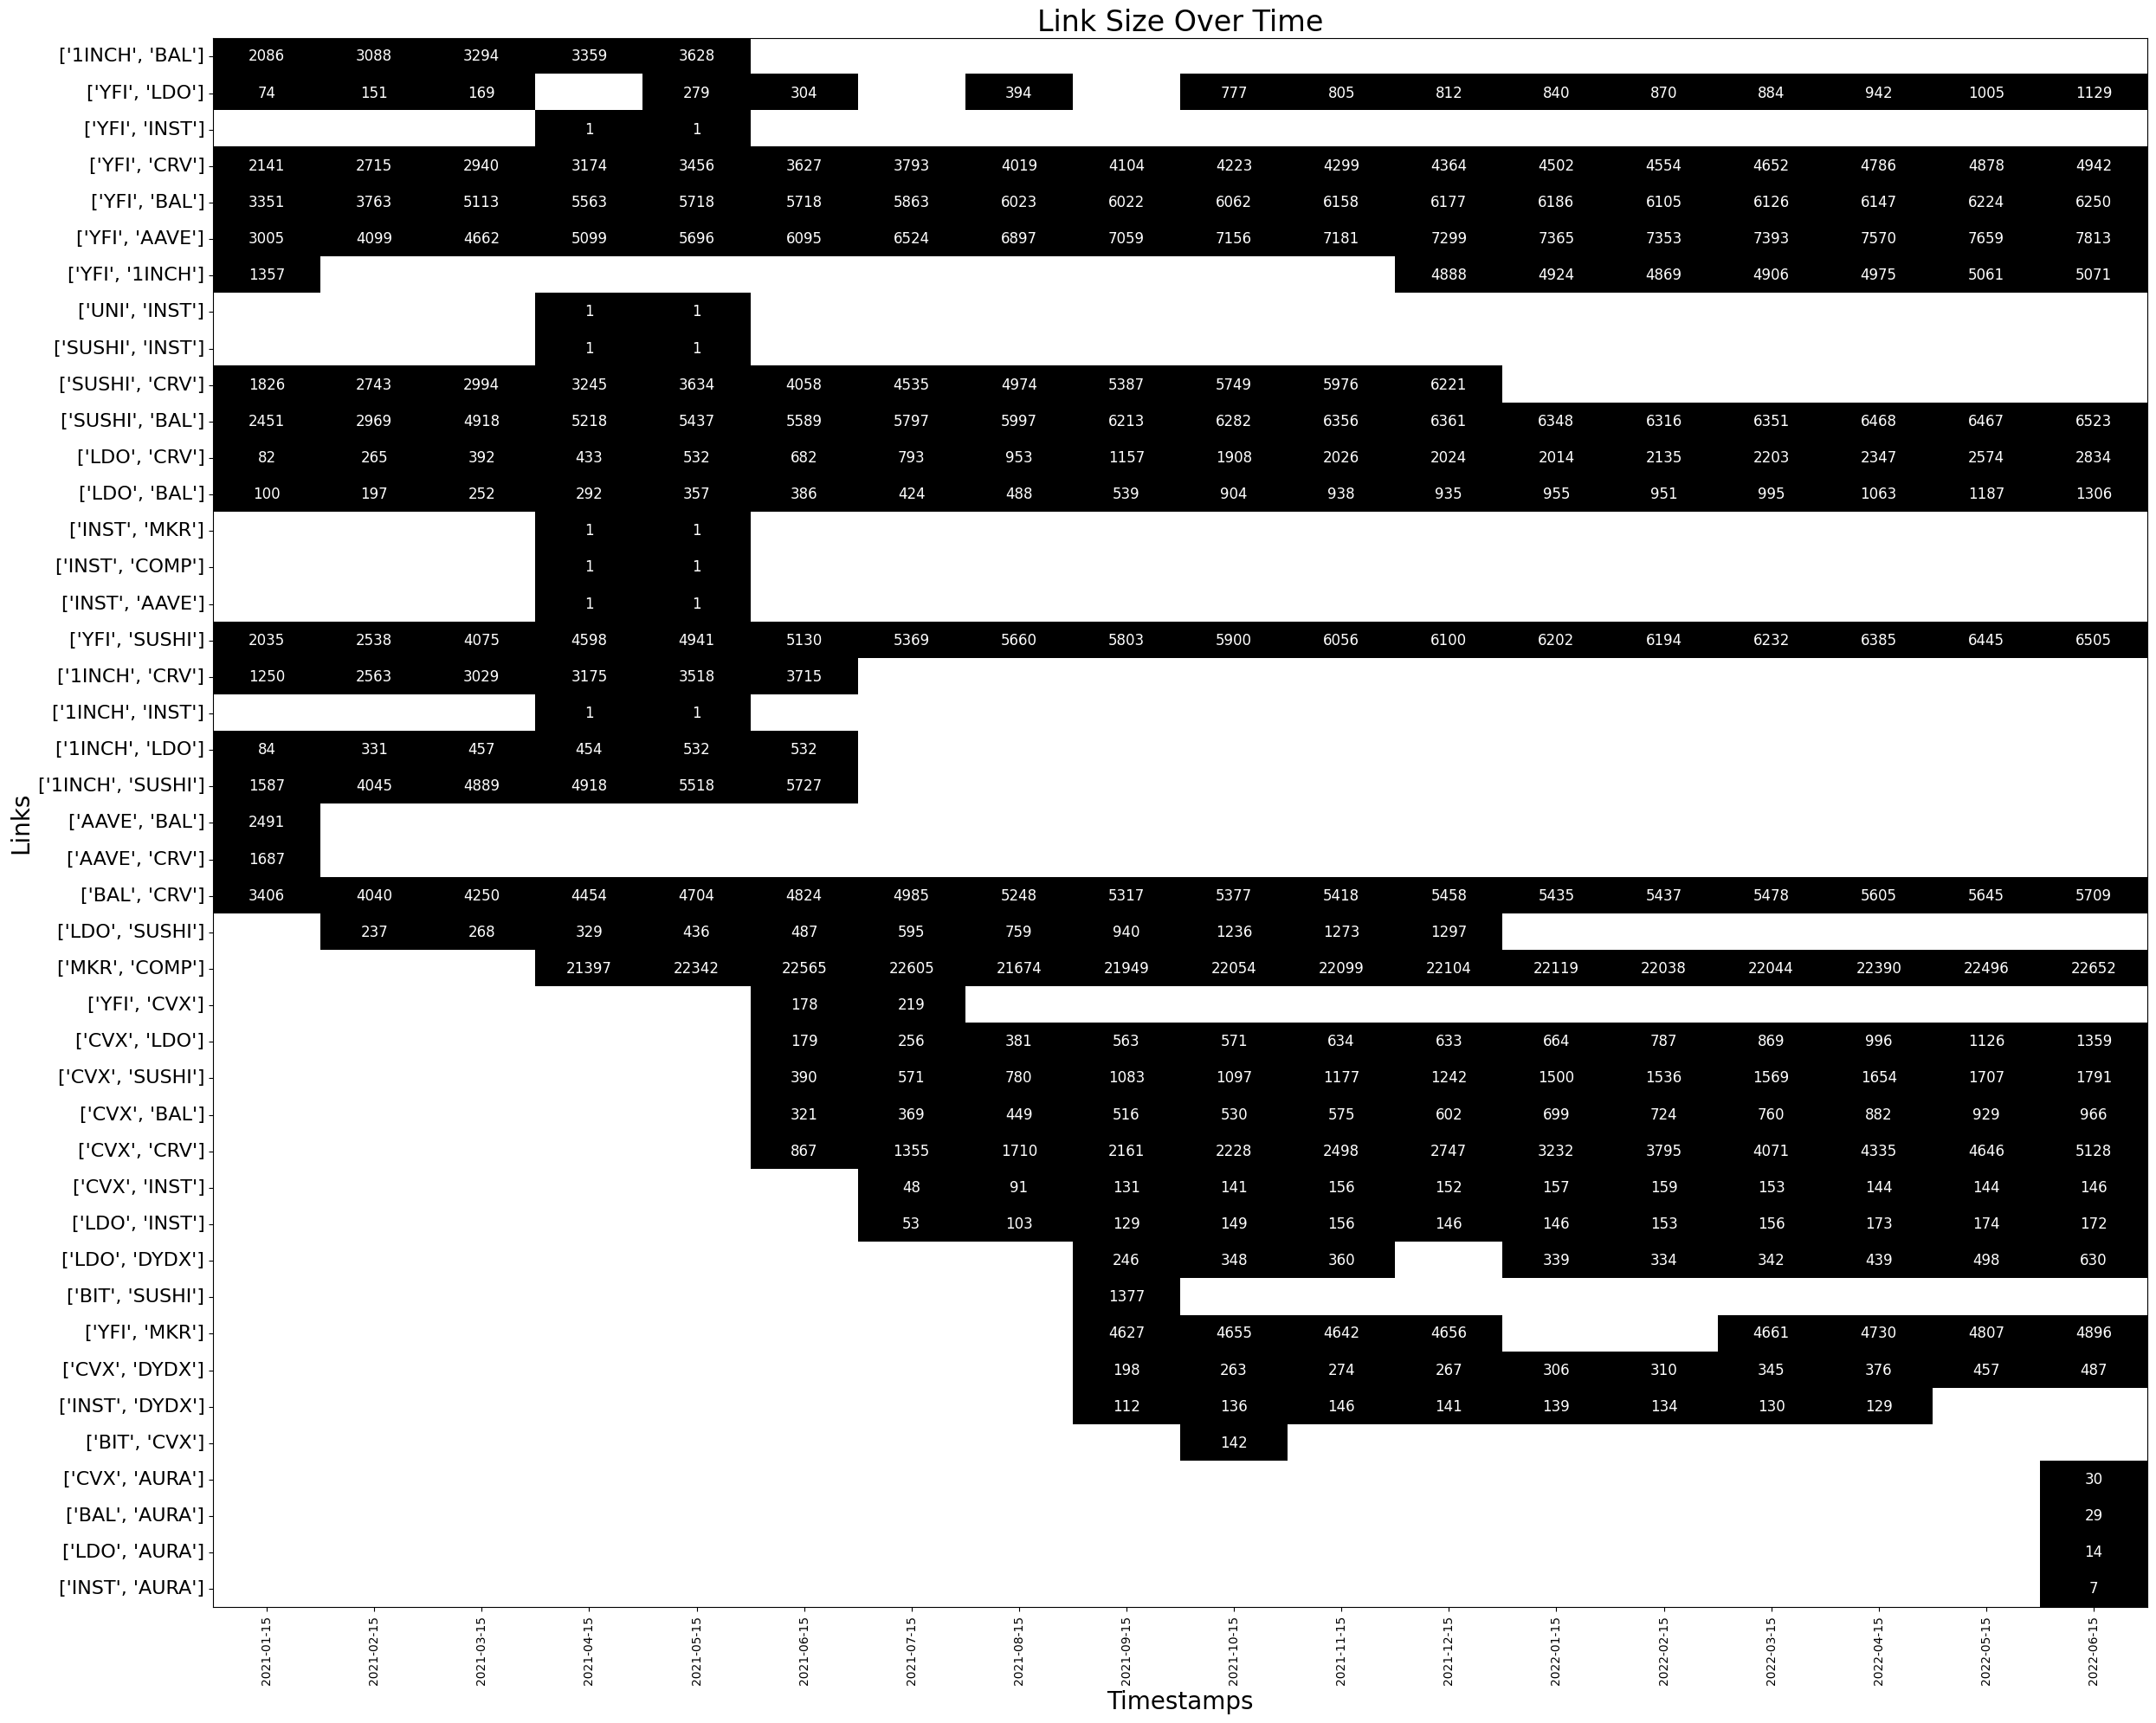

In [9]:
plot_link_size_over_time(metric_dataframes, group='sample', output_path="../output/links/", save=True, show=True)

### Fig: link growth over time 

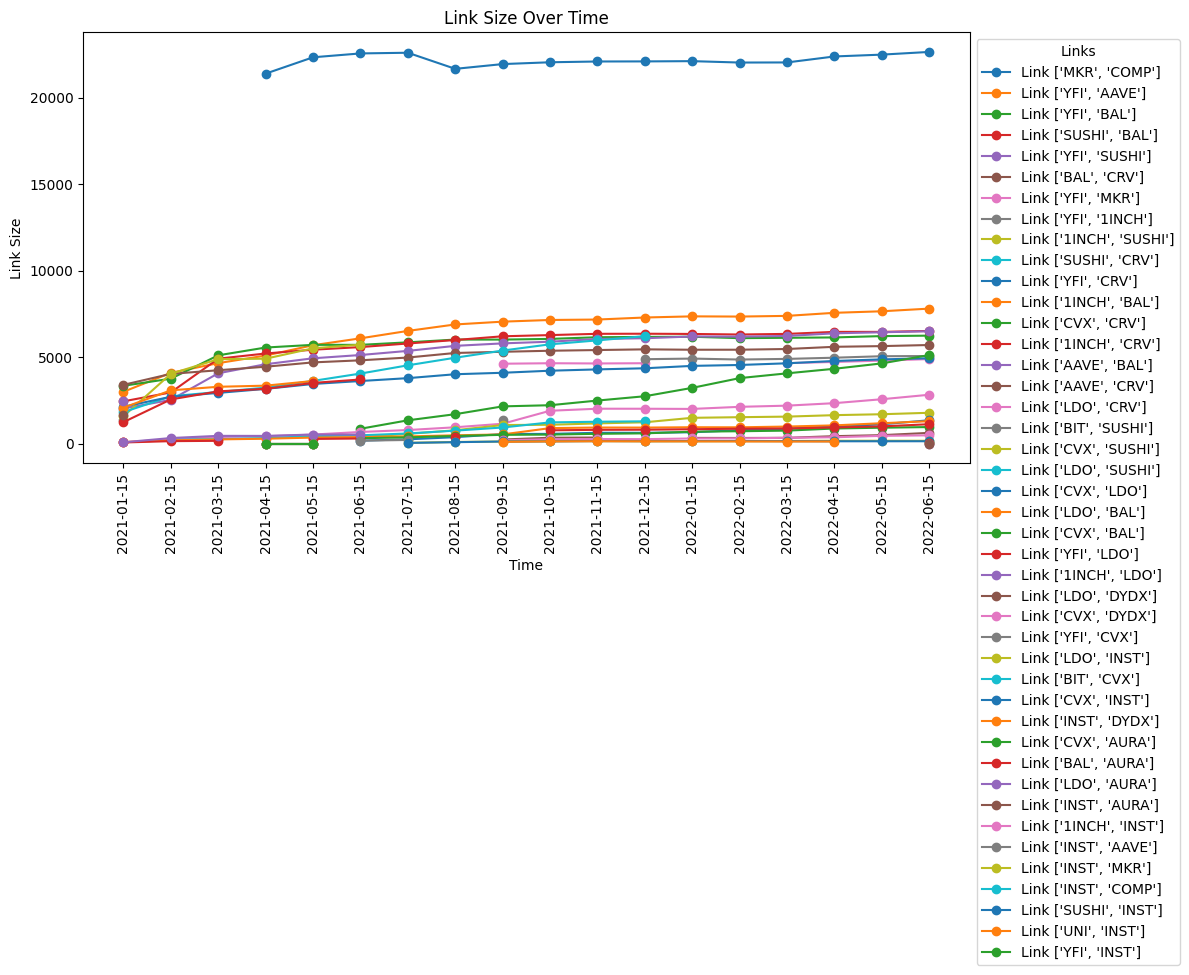

In [10]:
plot_link_growth_over_time(metric_dataframes, group='sample', output_path="../output/links/", save=True, show=True)

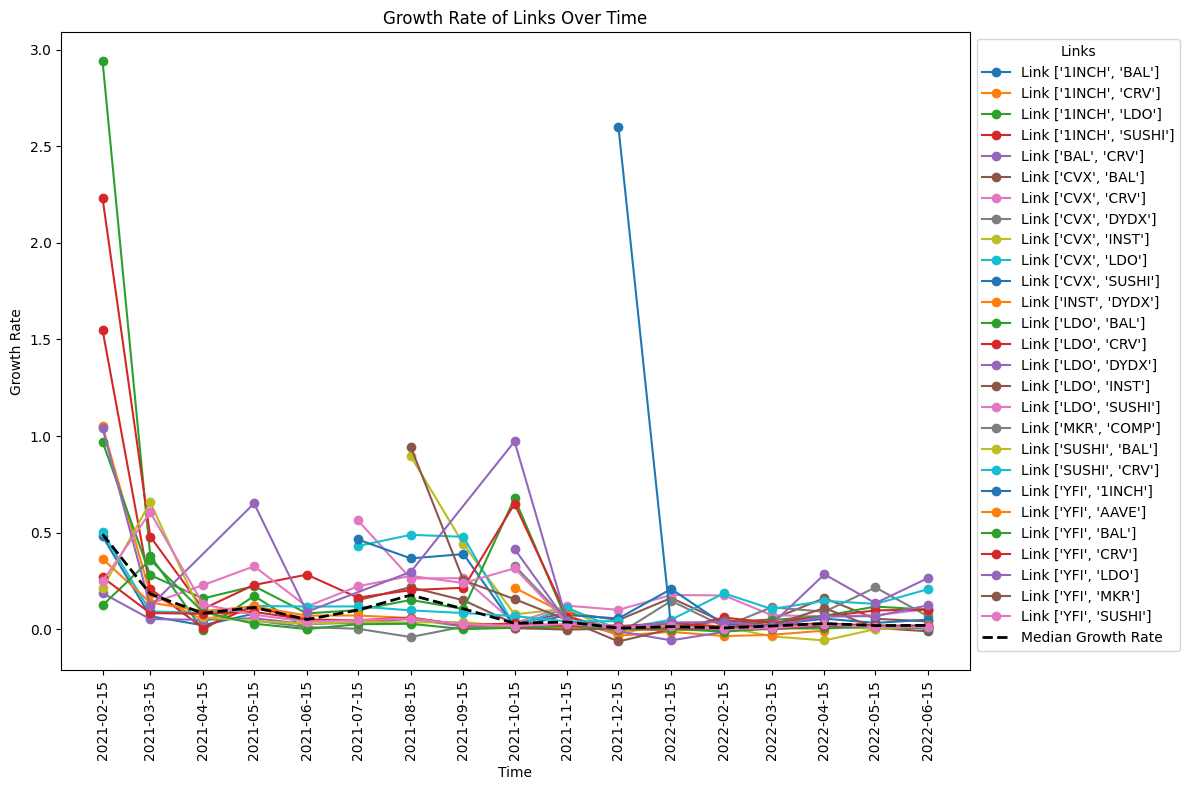

In [11]:
plot_link_growth_rate_over_time(metric_dataframes, group='sample', output_path="../output/links/", save=True, show=True)

/home/xm3van/research-project-erc20-governance/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/xm3van/research-project-erc20-governance/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


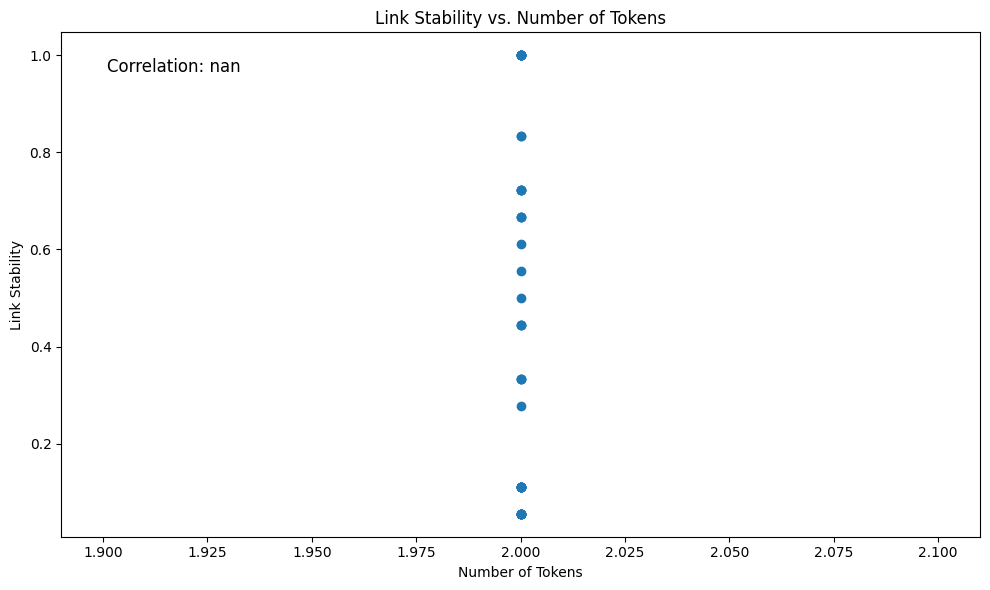

In [12]:
plot_link_stability_vs_no_of_tokens(metric_dataframes, group='sample', output_path="../output/links/", save=True, show=True)

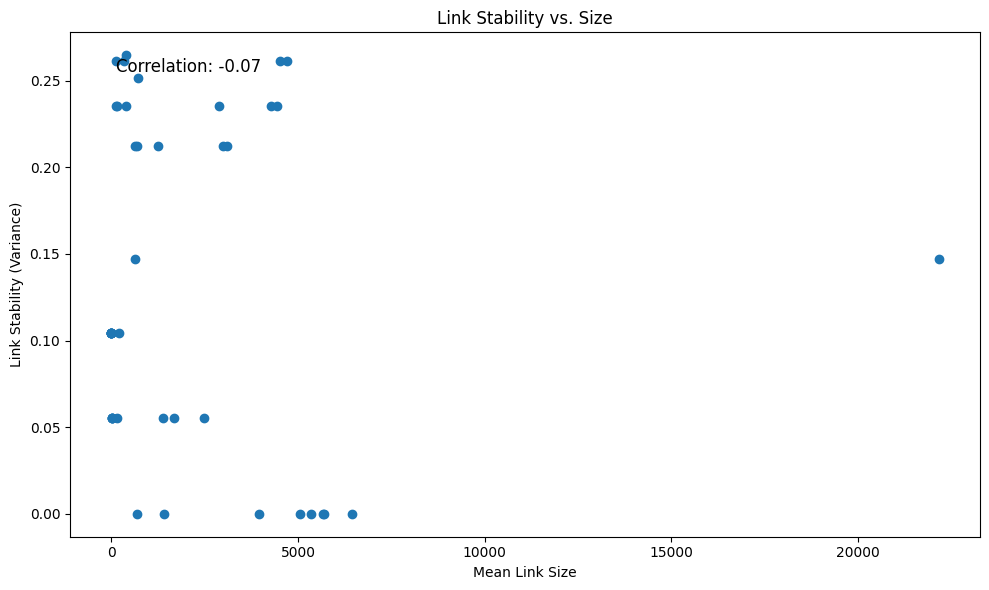

In [13]:
plot_link_stability_vs_size(metric_dataframes, group='sample', output_path="../output/links/", save=True, show=True)

### Fig: link_size vs total_influence 

In [14]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# from os.path import join

# def plot_clique_size_influence_correlation(metric_dataframes, method='upper_bound', group='sample', output_path="output/cliques/", save=True, show=True):
#     # Define dfs
#     df_size = metric_dataframes[method][group]['size_clique']
#     df_influence = metric_dataframes[method][group]['total_influence']

#     # Calculate correlations for each timestamp
#     correlations = df_size.corrwith(df_influence, axis=0)

#     # Plotting the correlations
#     plt.figure(figsize=(10, 5))
#     plt.plot(correlations.index, correlations, marker='o', linestyle='-')
#     plt.xlabel('Timestamps', fontsize=12)
#     plt.ylabel('Correlation between Clique Size and Total Influence', fontsize=12)
#     plt.title(f'[{method.upper()}]: Correlation of Clique Size and Total Influence Over Time', fontsize=14)
#     plt.grid(True)

#     plt.xticks(rotation=90)  # Rotate x-tick labels by 90 degrees

#     # Save the plot to the specified output path
#     if save:
#         plt.savefig(join(output_path, f'clique_size_influence_correlation_{method}_{group}.png'))

#     if show:
#         plt.show()
#     else:
#         plt.close()

# # Example usage
# plot_clique_size_influence_correlation(metric_dataframes, method='upper_bound', group='sample', save=False, show=True)


### Fig: total_influence

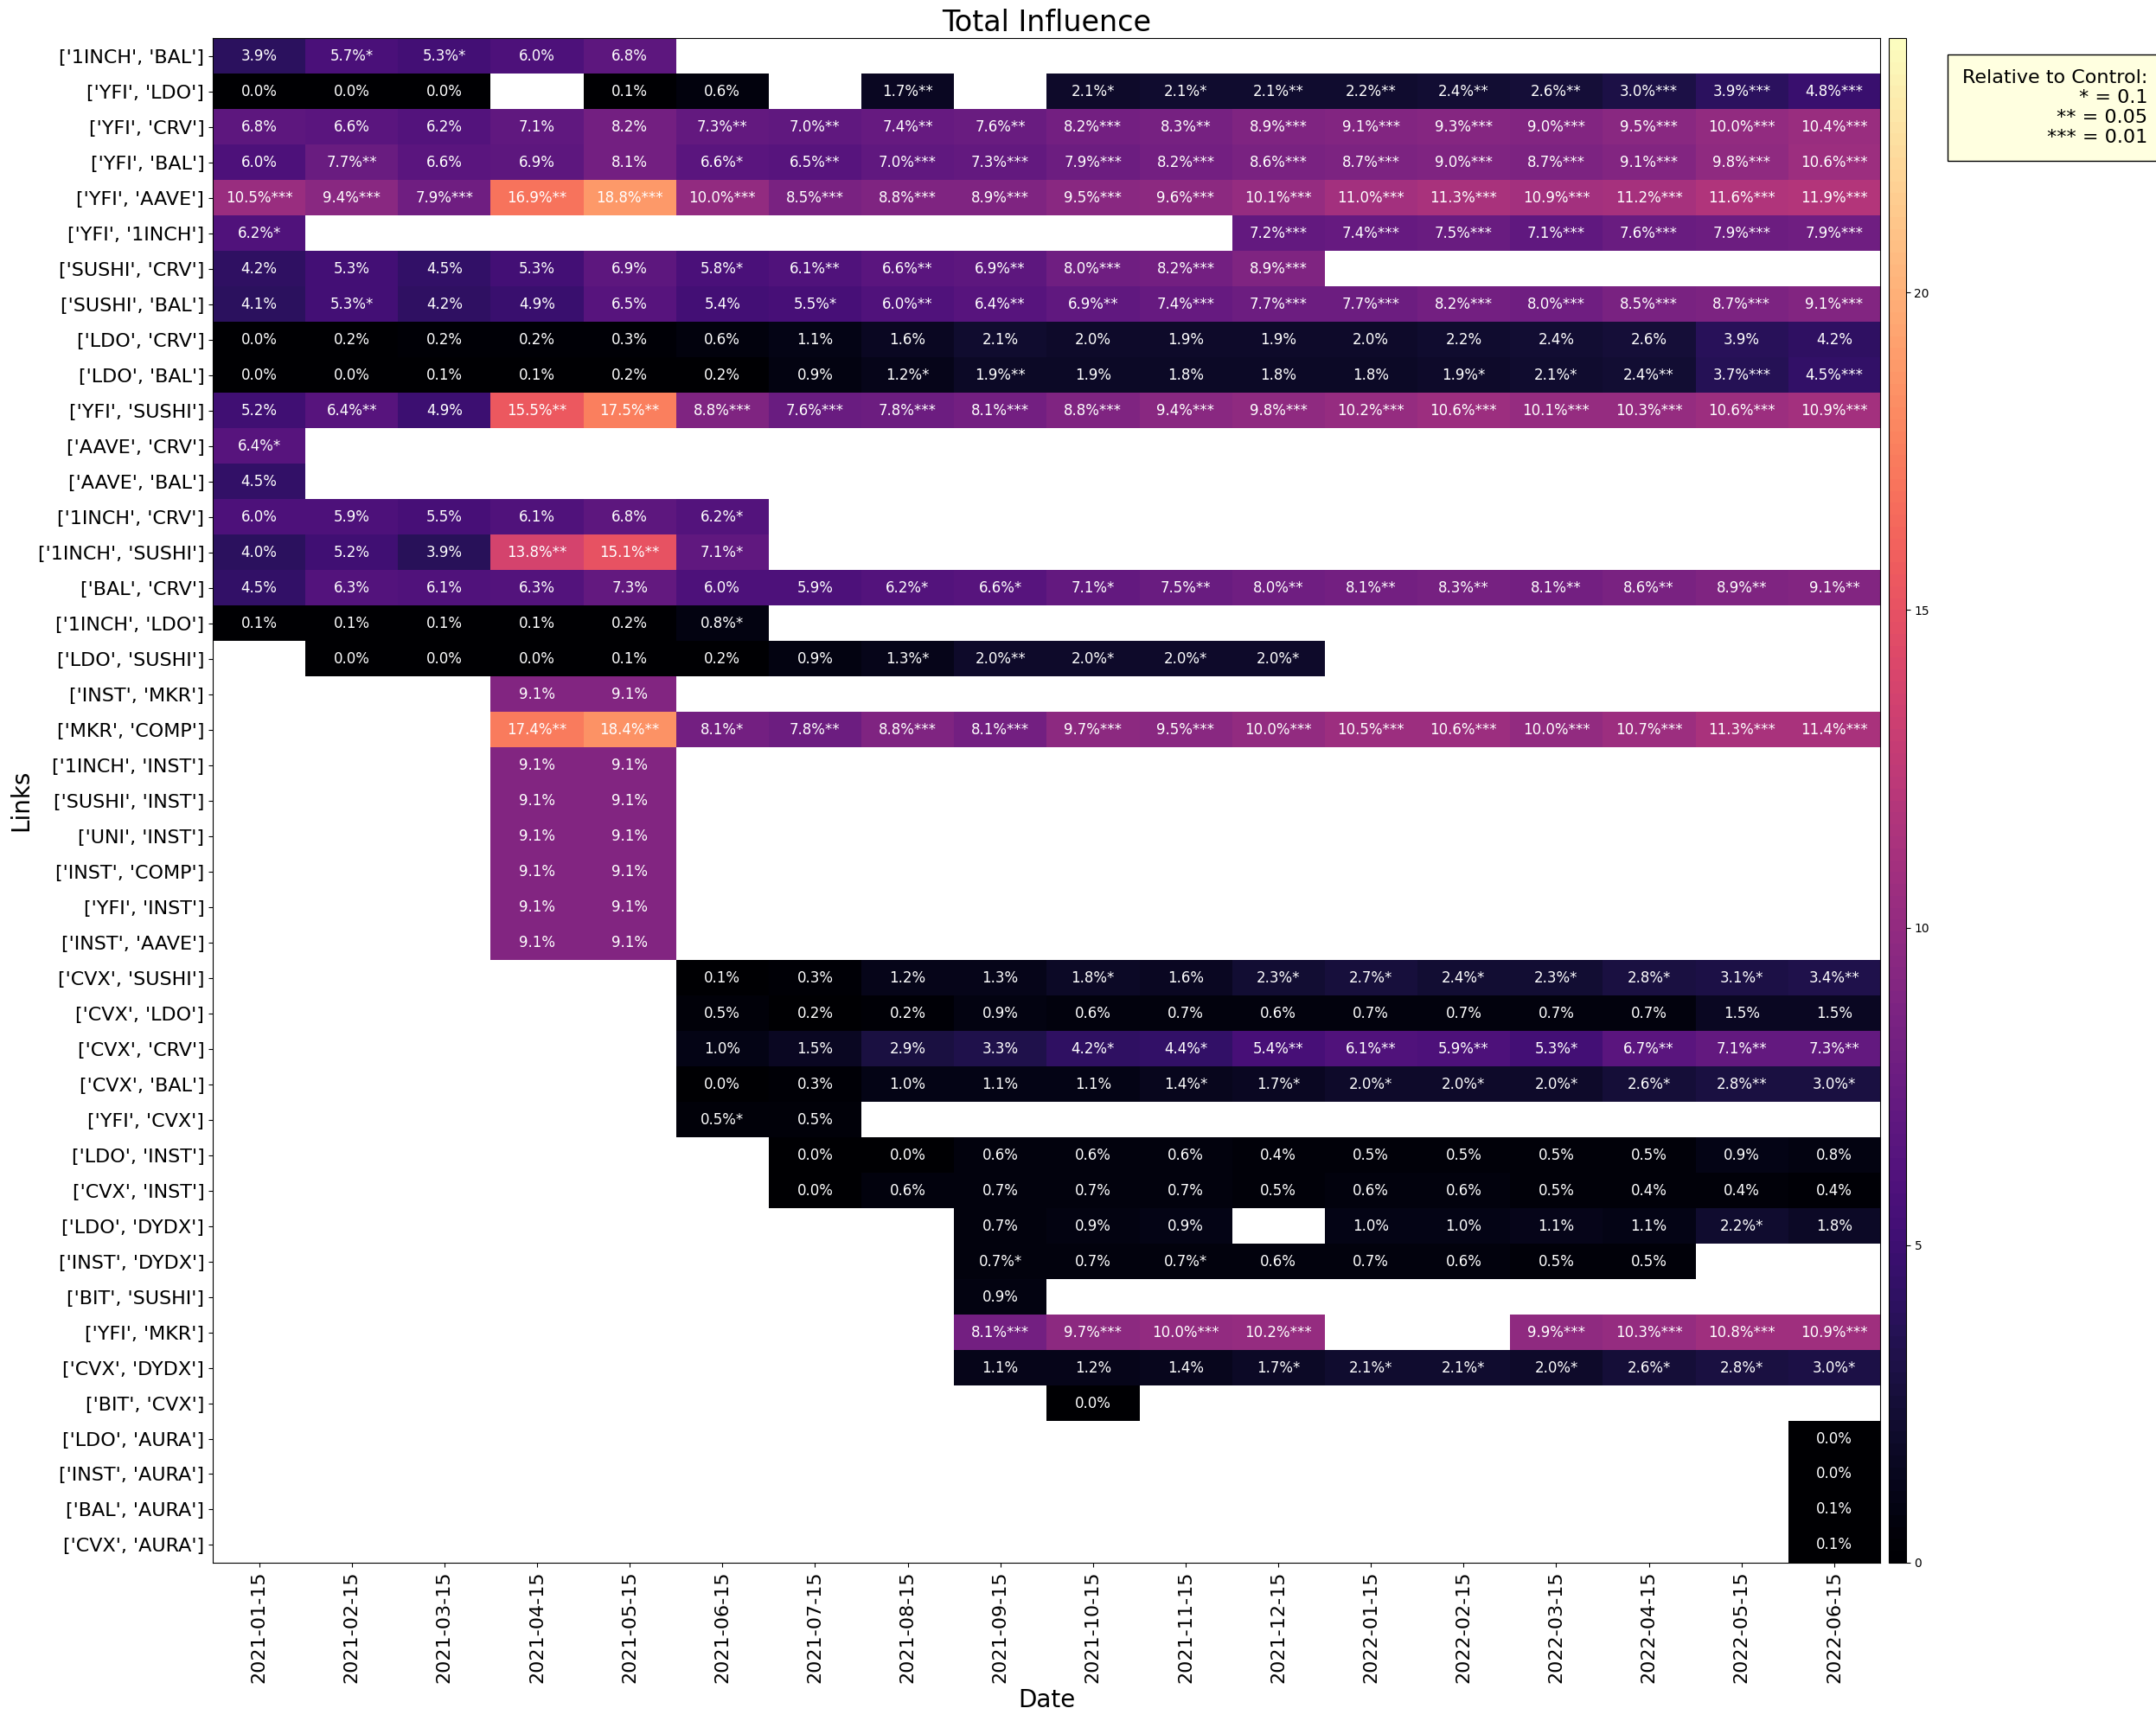

In [25]:
plot_heatmap_chart(metric_dataframes, metric_name='total_influence', pct=True,  log=False, output_path="../output/links/", save=True, show=True)

Observations: 
1. **High Influence in Specific Links**: Certain cliques, such as those involving YFI (Yearn Finance), consistently show high influence over time. For instance, links like ['YFI', 'LDO'], ['YFI', 'AAVE'],  ['YFI', 'MKR'] and ['YFI', 'SUSHI'] exhibit a significant and persistent influence, indicating that addresses associated with YFI hold considerable governance power across multiple protocols. 

2. **Central Role of YFI**: YFI seems to act as a central node within the network, linking to many other tokens. This central position might be due to Yearn Finance's role as a yield aggregator, which integrates with various DeFi protocols to optimize returns for its users. YFI holders seem to hold several other token making them influential in term of prevlant goverance power in a lot of protocol form persistent statstically validated link in the network projects and holding significant control relative to permuted samples.

3. **Statistical Significance**: The heatmap indicates statistical significance for various cliques with stars denoting different significance levels (p < 0.01, p < 0.05, and p < 0.1). This suggests that the observed influence of these cliques relative to samples taken from all token hold, meaningfully more. Link involving INSTA display high values for 2021-04-15 and 2021-05-15, yet are not significant because the the token was launched and later on distributed, meaning that the permutation test scored high permuted control samples. 

4. **Temporal Changes**: There are visible changes in influence over time. For example, the influence of the ['MKR', 'COMP'], ['YFI', 'AAVE'], ['YFI', 'SUSHI'] and ['SUSHI', '1INCH'] links starts to rise significantly from mid-2021 peking close to controlling up to 18.8% of prevlant goverance power on the network, suggesting a shift in a higher concentration of these tokens in the link. The concentration falls as the projections progress. Given these snapshot conincide prior to a market down turn this may suggest that these token where held with believe of price appreication rather than to participate in governance and where sold off with the market downturn to a base level held by potential user either believing in the long term investment or actual governance participants. 

5. **Increase in Control Over Time**: Many link defining wallet show an increasing trend in their influence over time. This could indicate a growing conentration in Link holding the respective token (i.e. see  ['CVX', 'CRV'],  ['SUSHI', 'BAL'],  ['YFI', 'MKR'],  ['LDO', 'CRV'],  ['YFI', 'CRV'],  ['YFI', 'BAL'],  ['CRV', 'DYDX'] ) of governance power as certain addresses accumulate more tokens or as new influential addresses enter the network.


### Fig: gini_total_influence

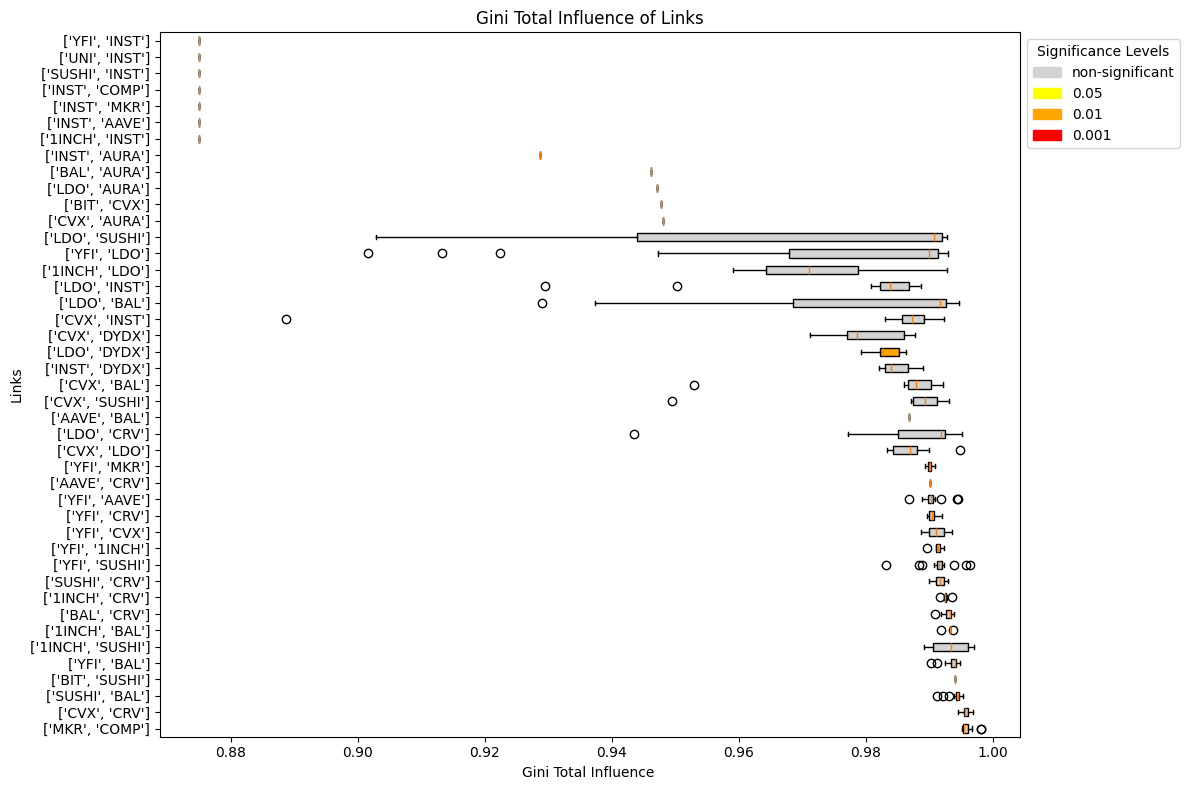

In [16]:
plot_boxplot_with_significance(metric_dataframes, metric='gini_total_influence', unit='', group='sample', output_path="../output/links/", save=True, show=True)

Observations: 
- The influence distribution within the link tends to be highly unequal with a gini coefficient close to 1 across cliques. This suggest that most substantial token supply is held by few addresses accross links. 
- Compare to permutated control samples they tend to be non-significant suggesting that control samples follow a simialry uneqal distribution.

### Fig: internal_influence 

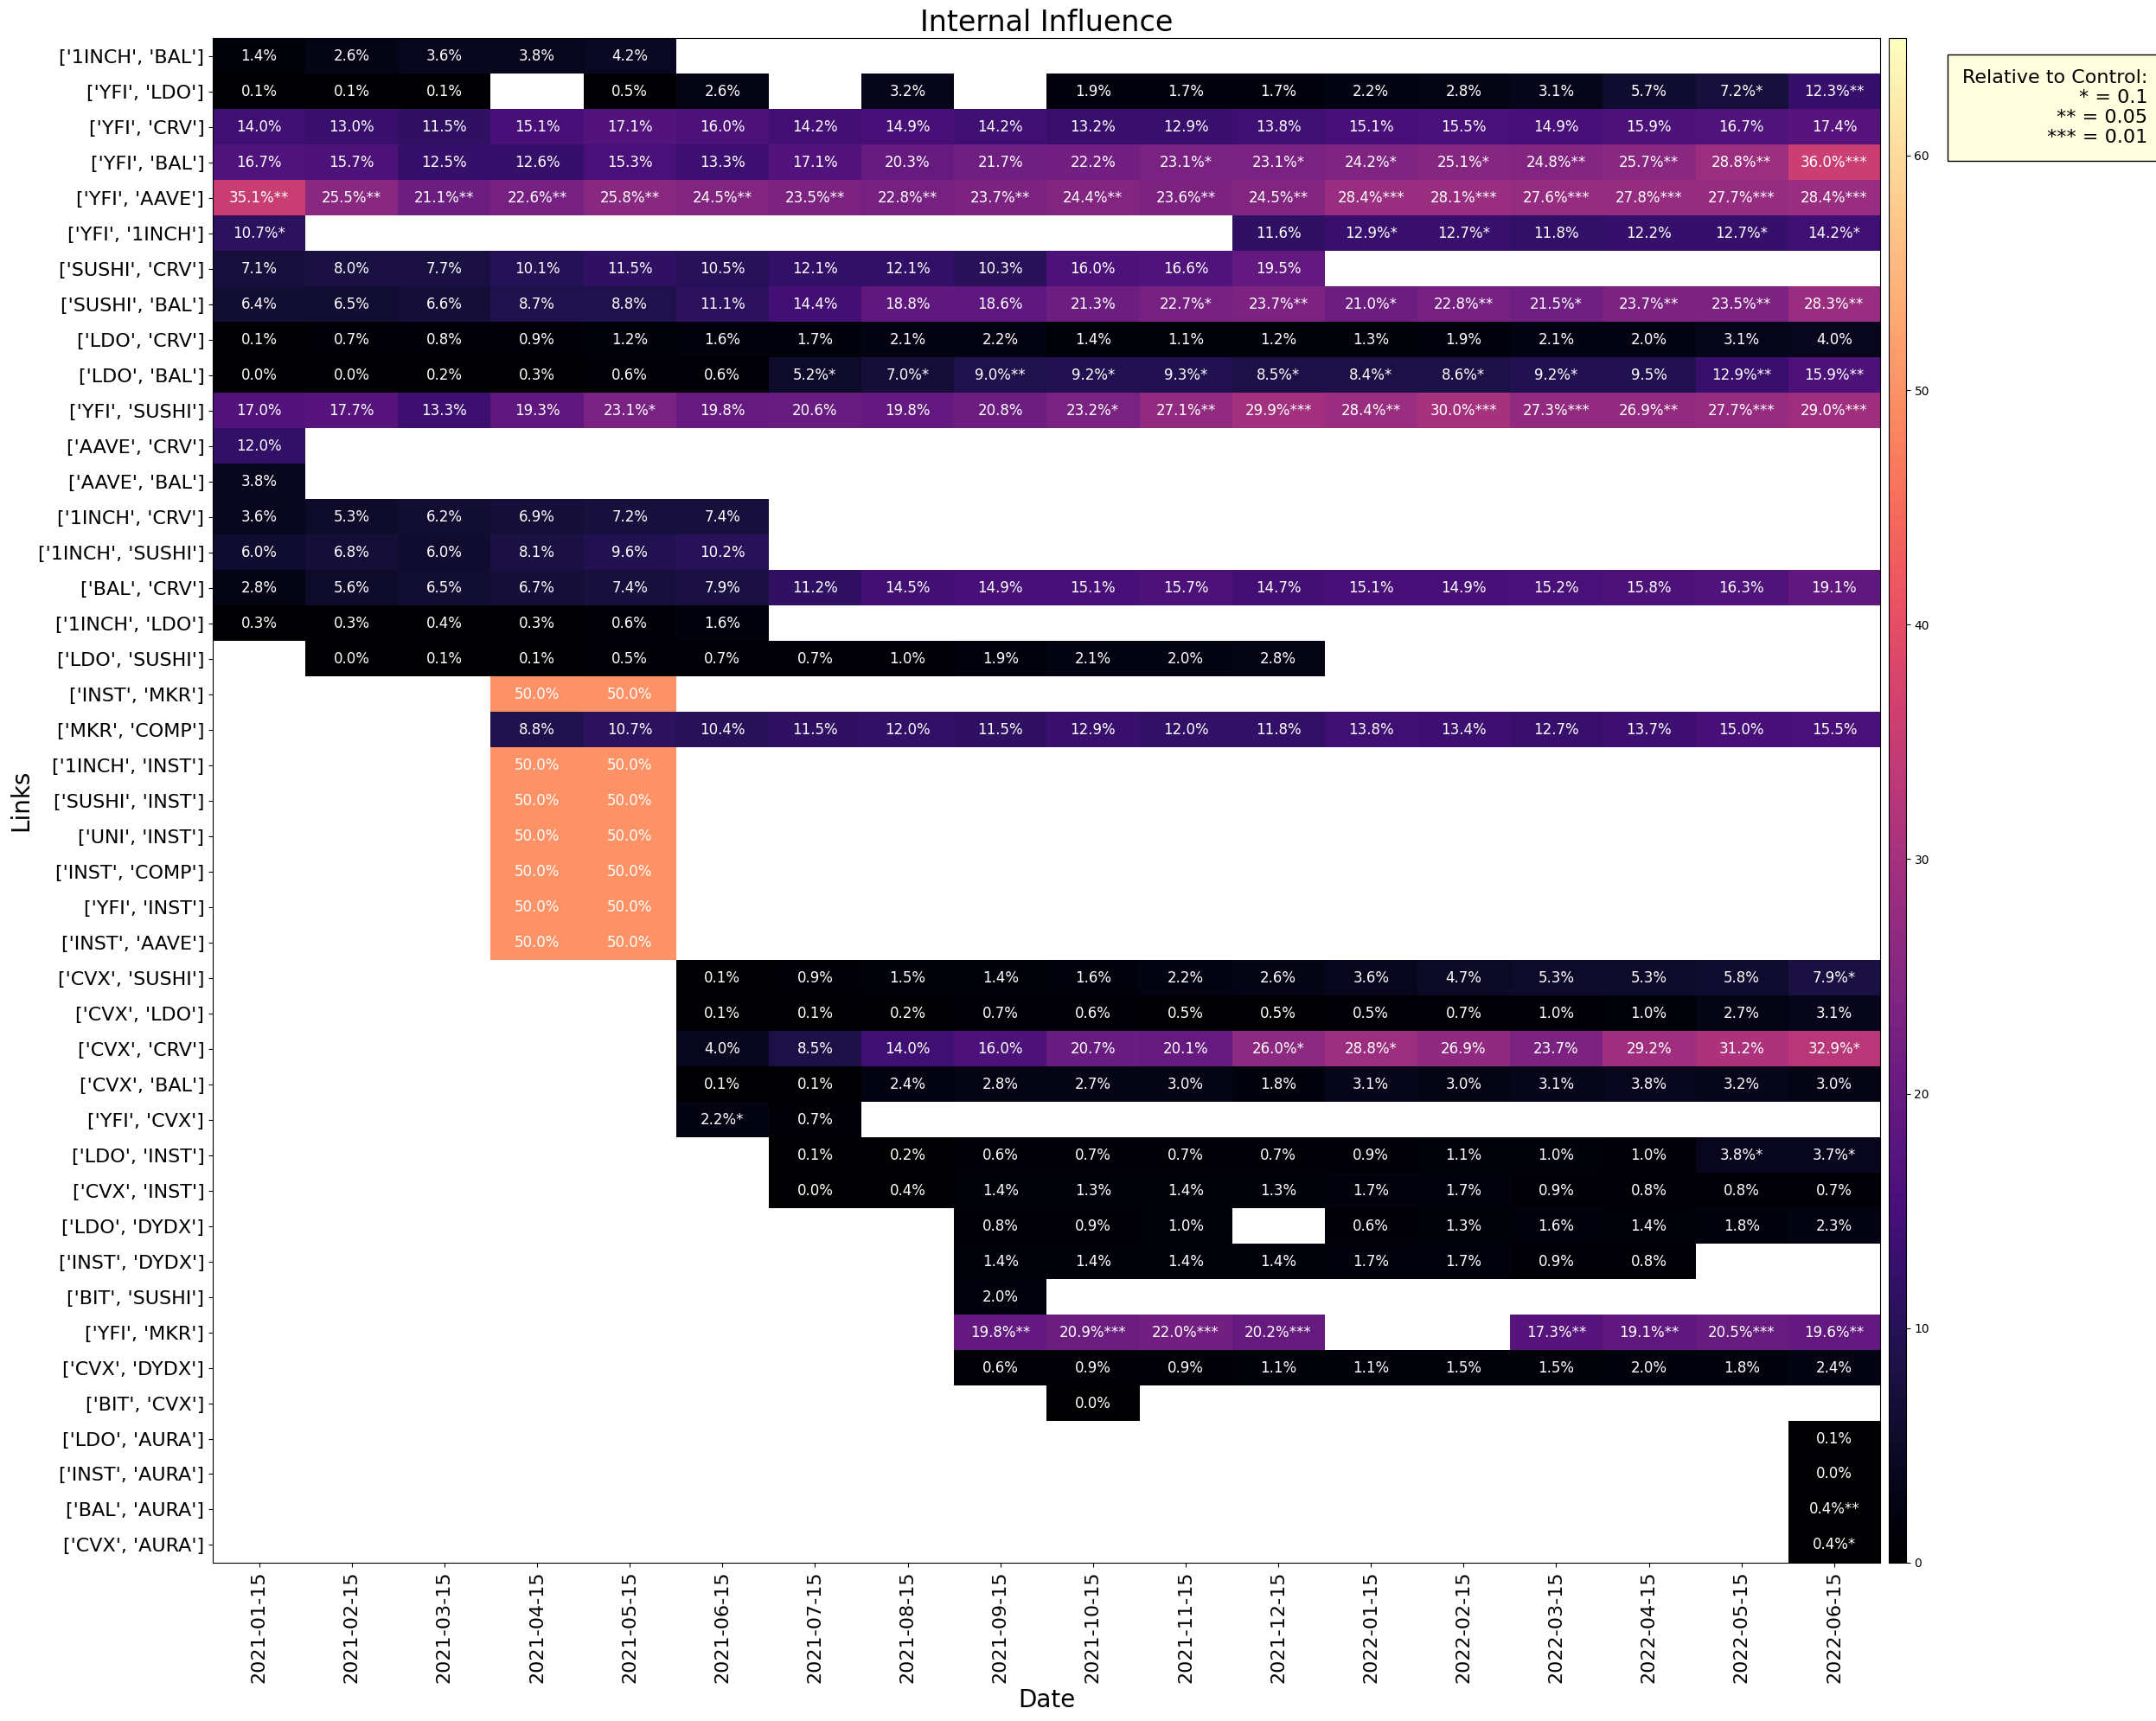

In [17]:
plot_heatmap_chart(metric_dataframes, metric_name='internal_influence', pct=True,  log=False, output_path="../output/links/", save=False, show=True)

### Fig: gini_internal_influence 

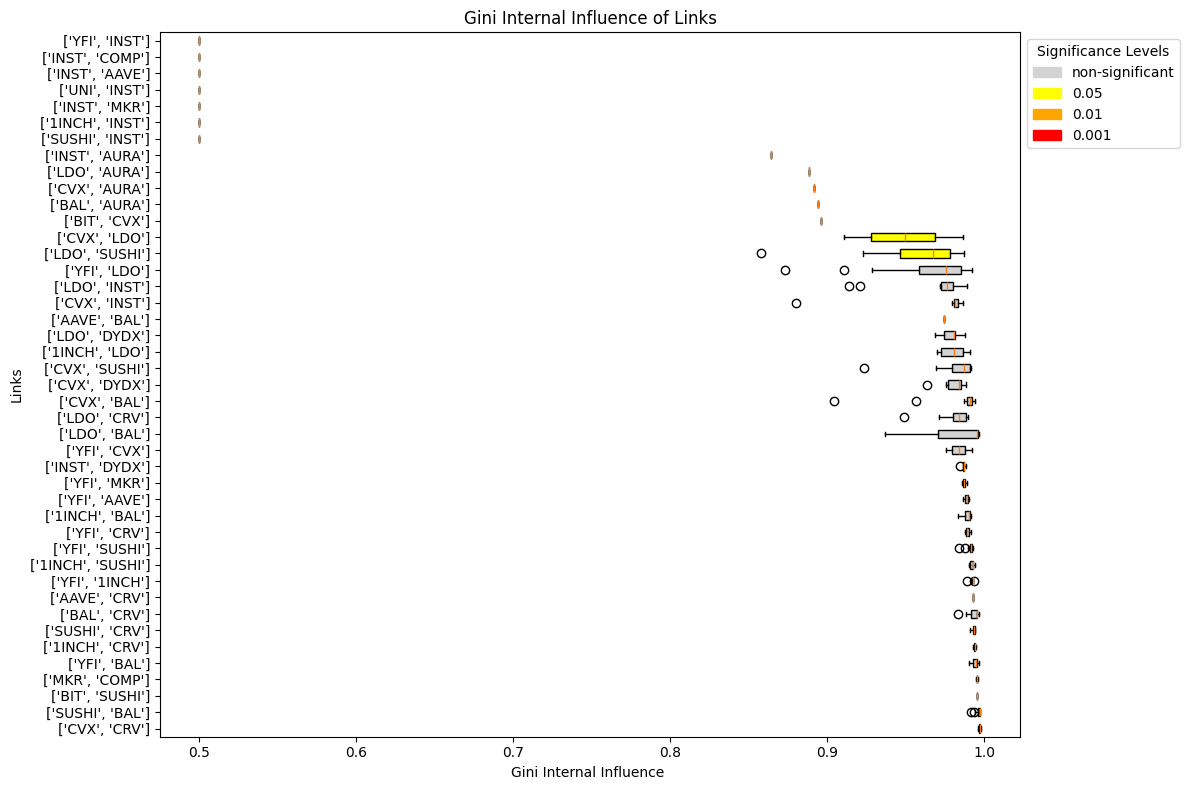

In [18]:
plot_boxplot_with_significance(metric_dataframes, metric='gini_internal_influence', unit='', group='sample', output_path="../output/links/", save=True, show=True)

### Fig: external_influence

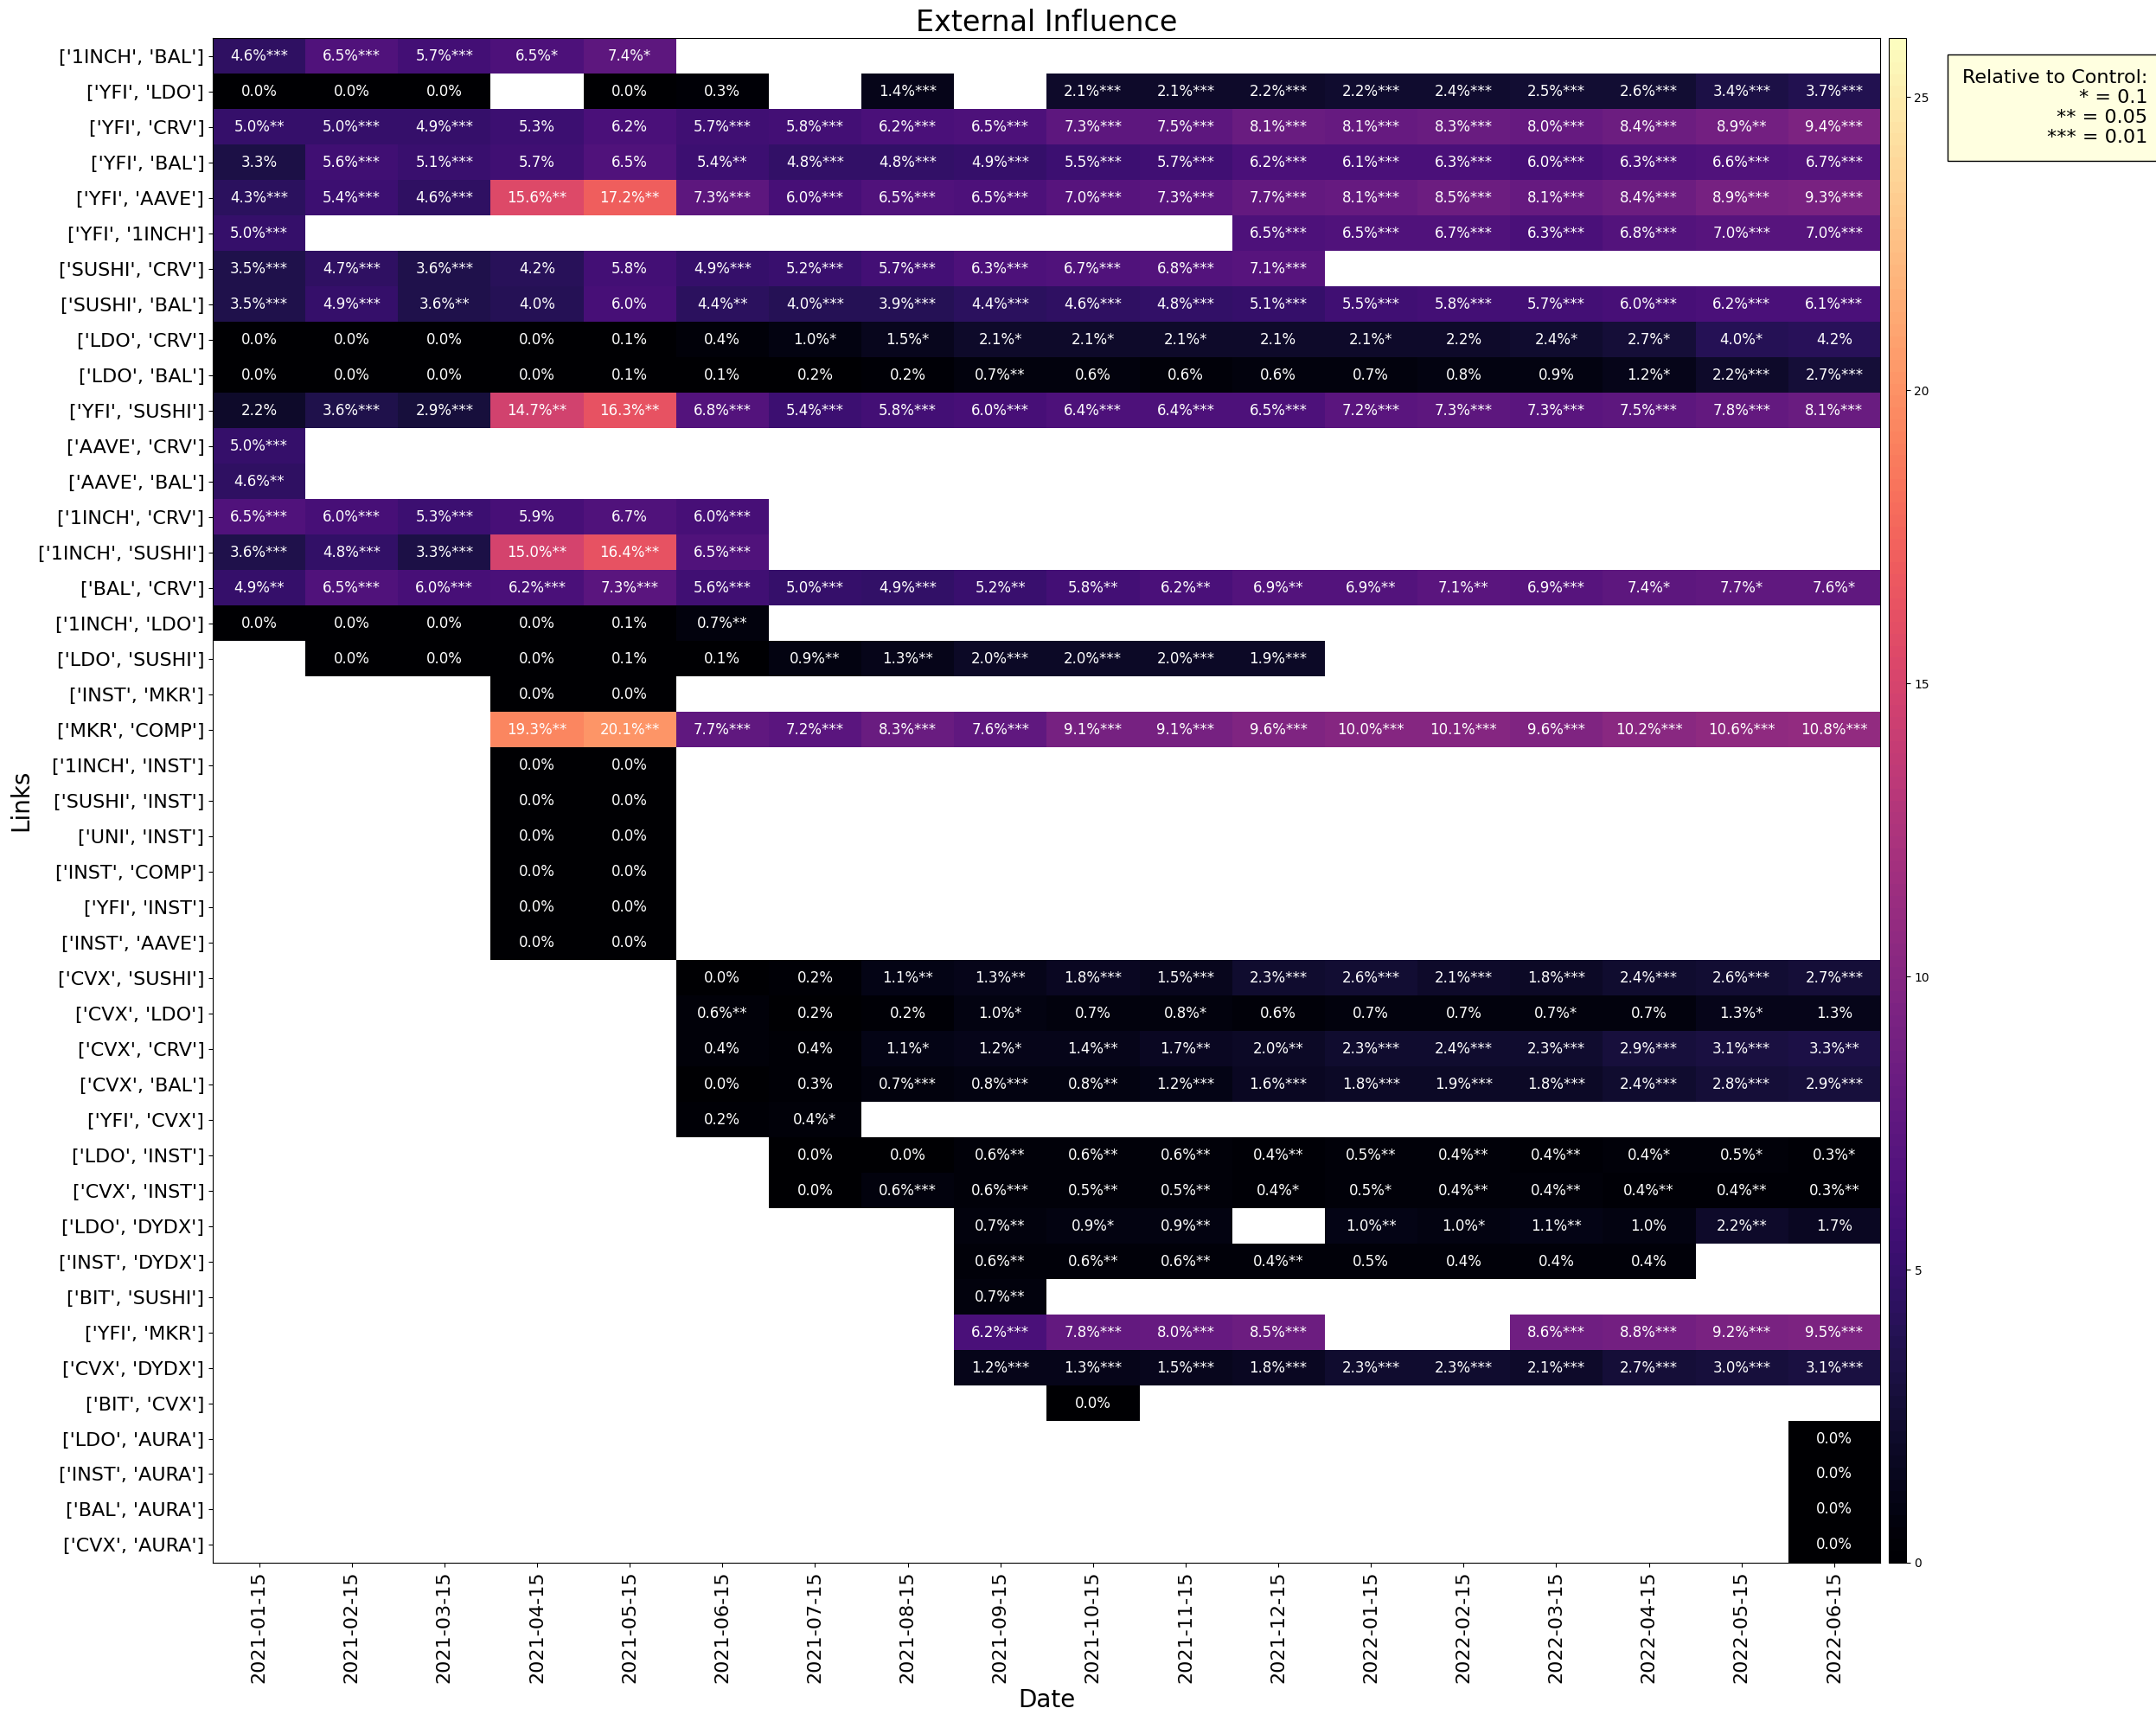

In [19]:
plot_heatmap_chart(metric_dataframes, metric_name='external_influence', pct=True, log=False, output_path="../output/links/", save=False, show=True)

### Fig: gini_external_influence

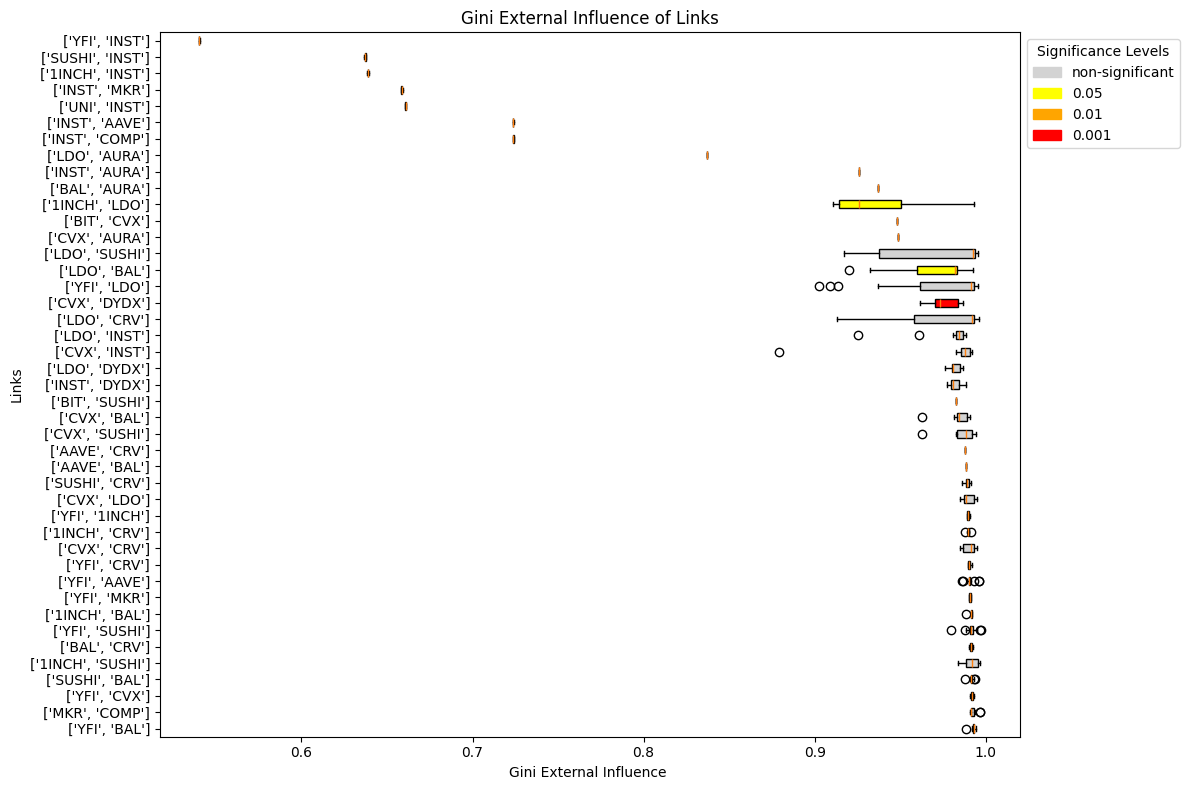

In [20]:
plot_boxplot_with_significance(metric_dataframes, metric='gini_external_influence', unit='', group='sample', output_path="../output/links/", save=True, show=True)

### Fig: wealth_clique


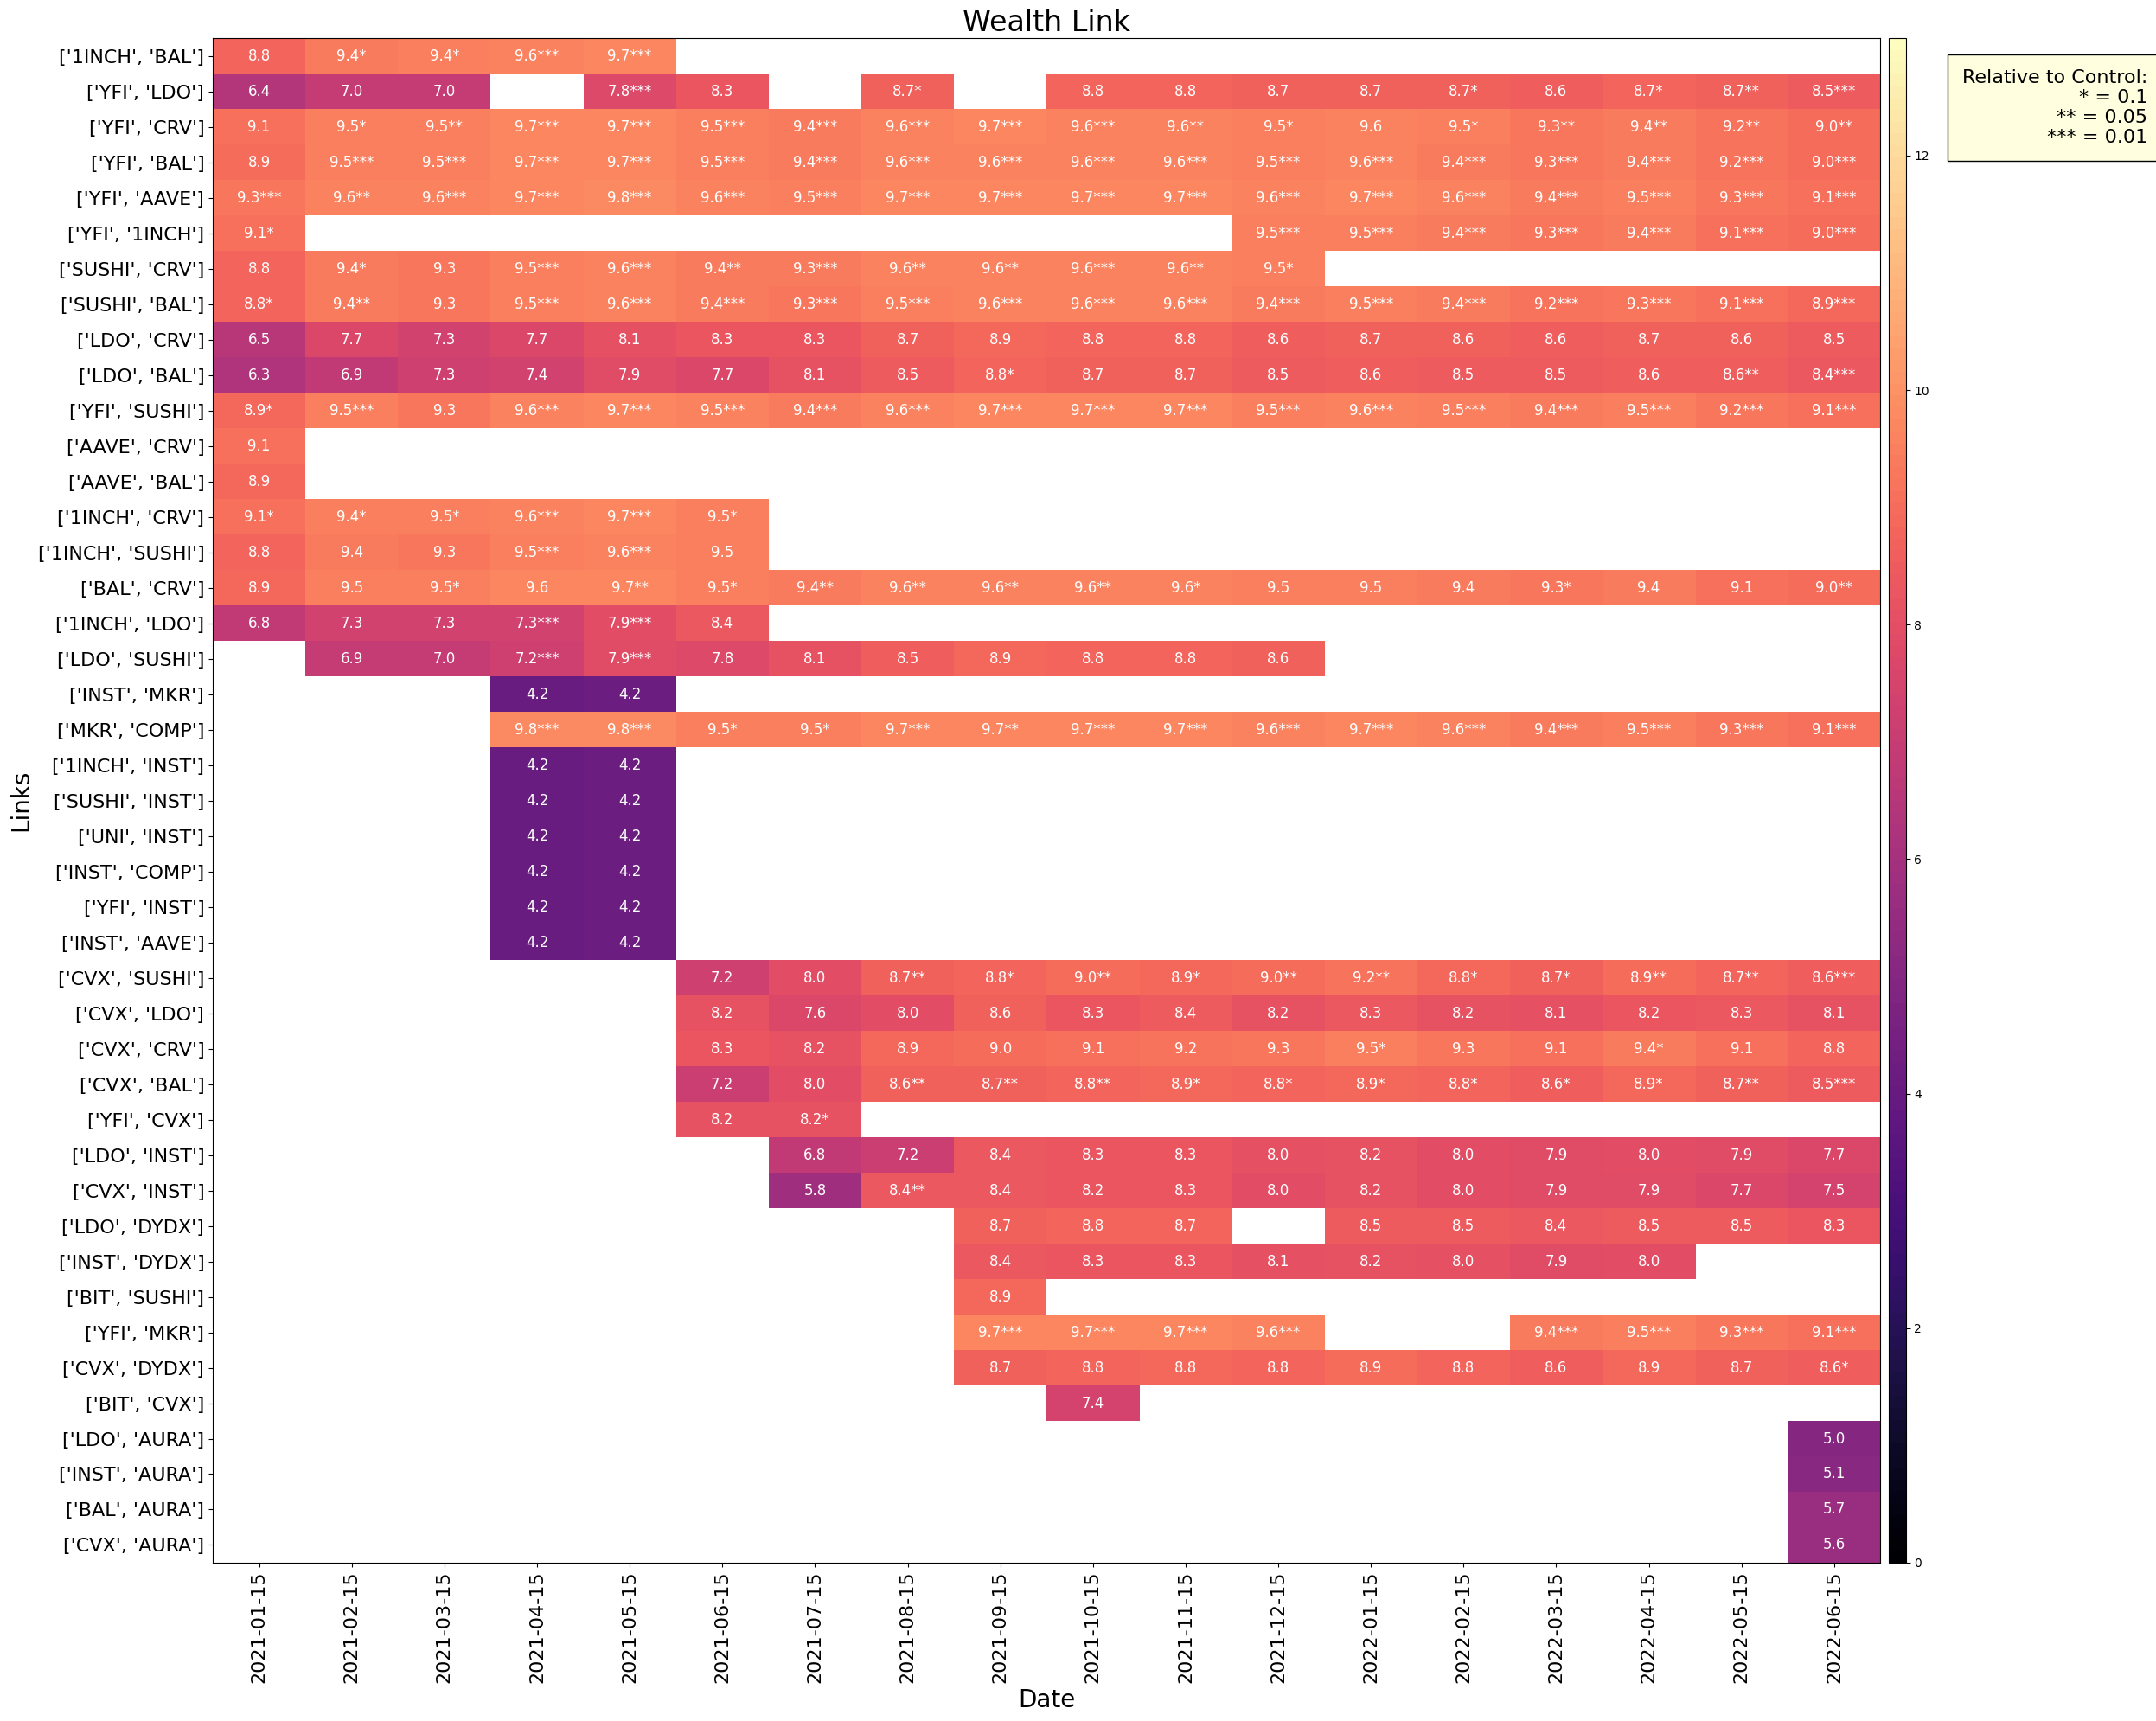

In [21]:
plot_heatmap_chart(metric_dataframes, metric_name='wealth_link', pct=False, log=True, output_path="../output/links/", save=False, show=True)

### Fig: gini_wealth_clique

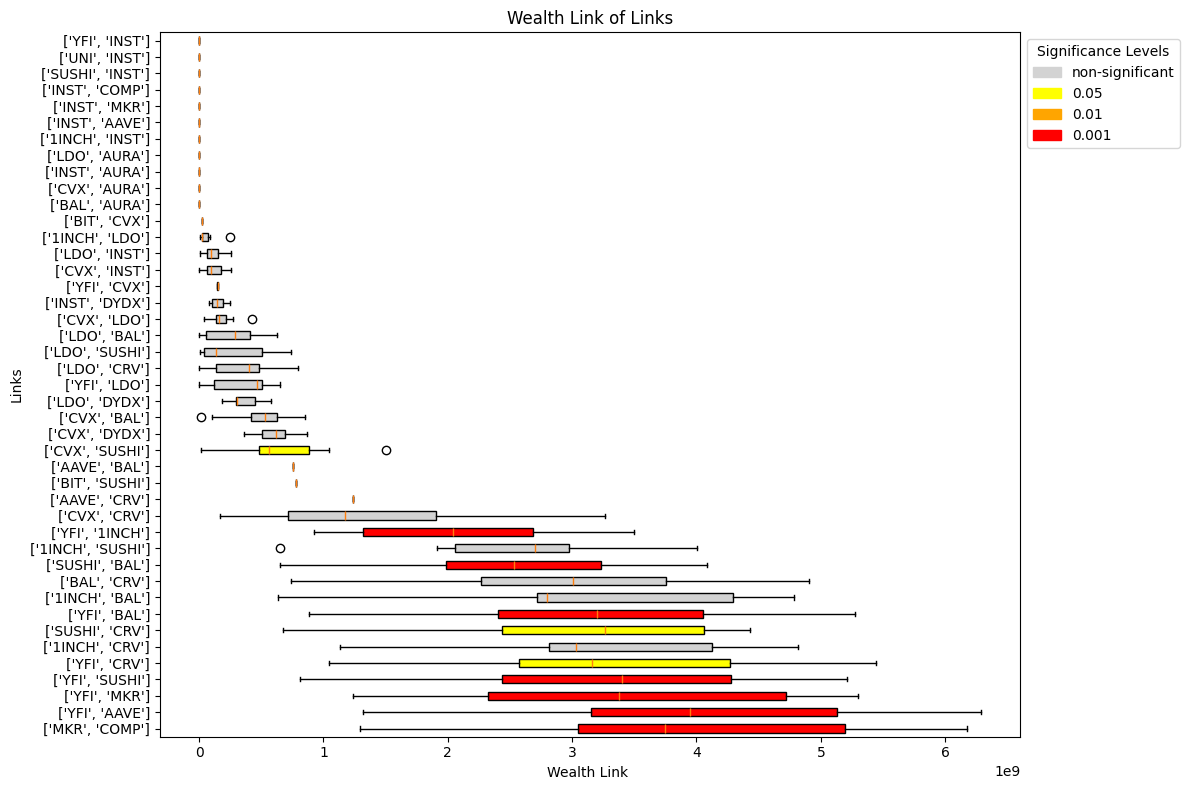

In [22]:

plot_boxplot_with_significance(metric_dataframes, metric='wealth_link', unit='', group='sample', output_path="../output/links/", save=True, show=True)


### Fig: median_no_assets_link


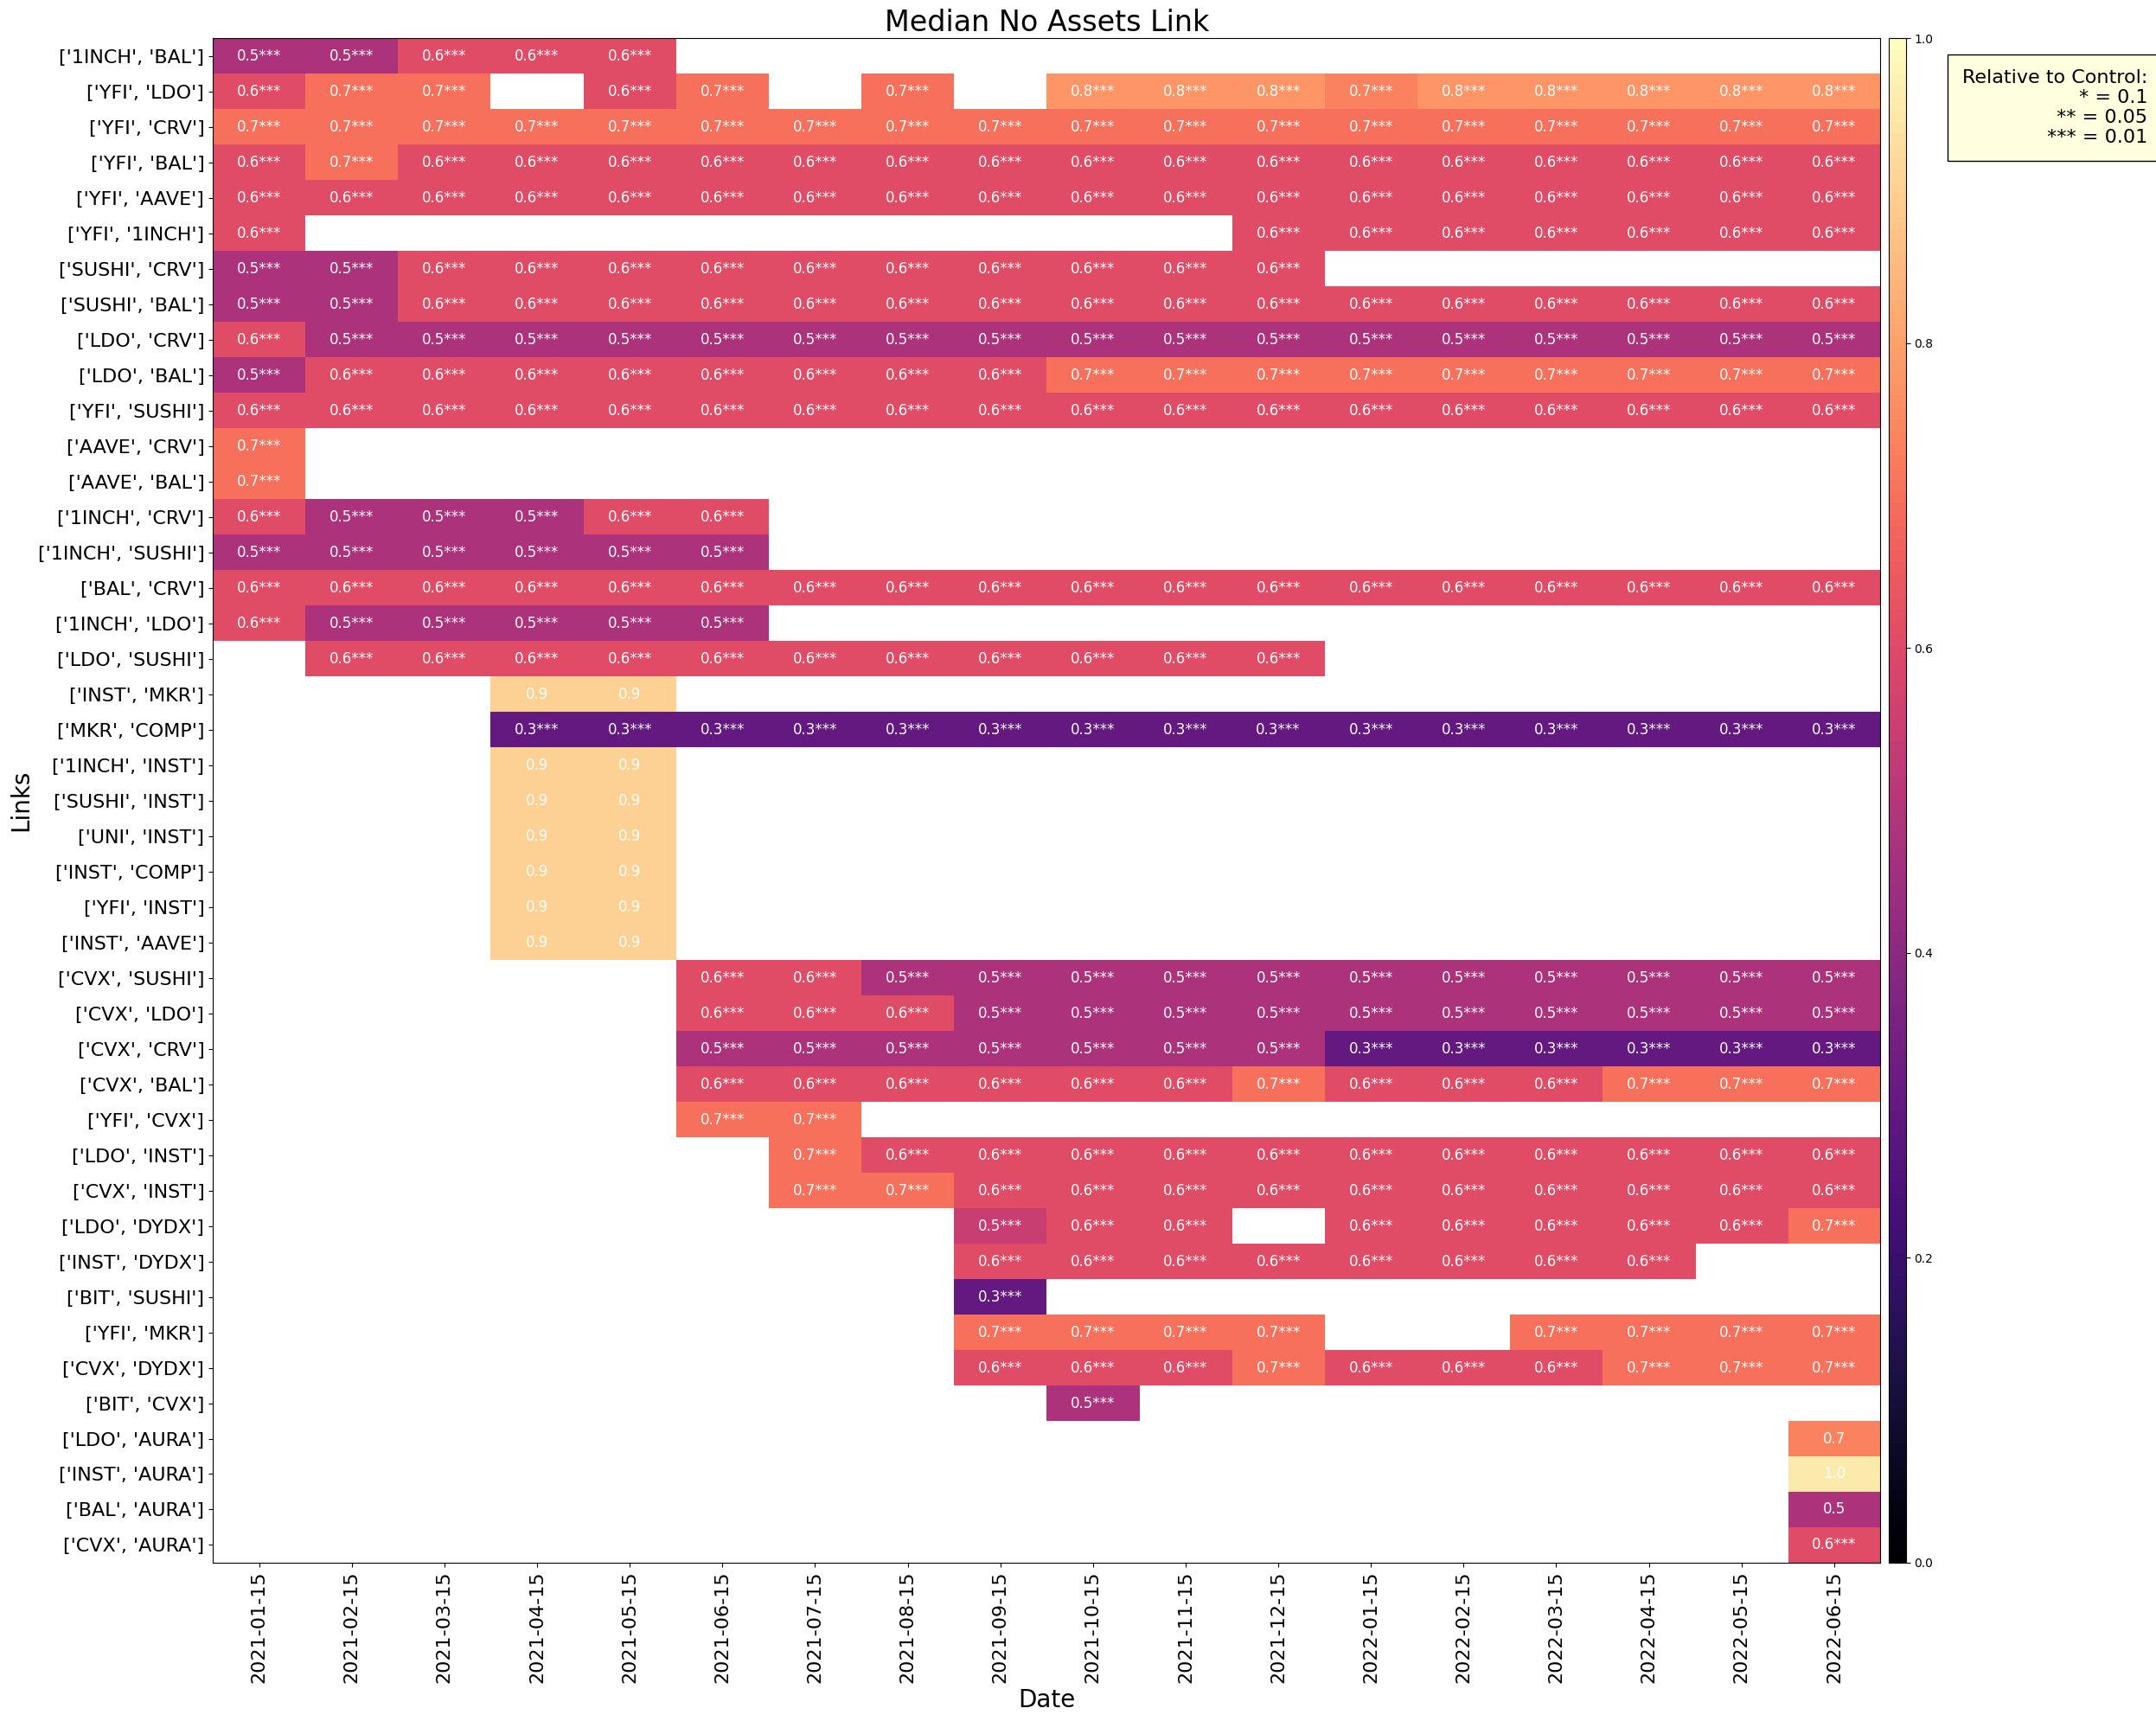

In [23]:
plot_heatmap_chart(metric_dataframes, metric_name='median_no_assets_link', pct=False, log=True, output_path="../output/links/", save=False, show=True)

### Fig: Distribution of Labels

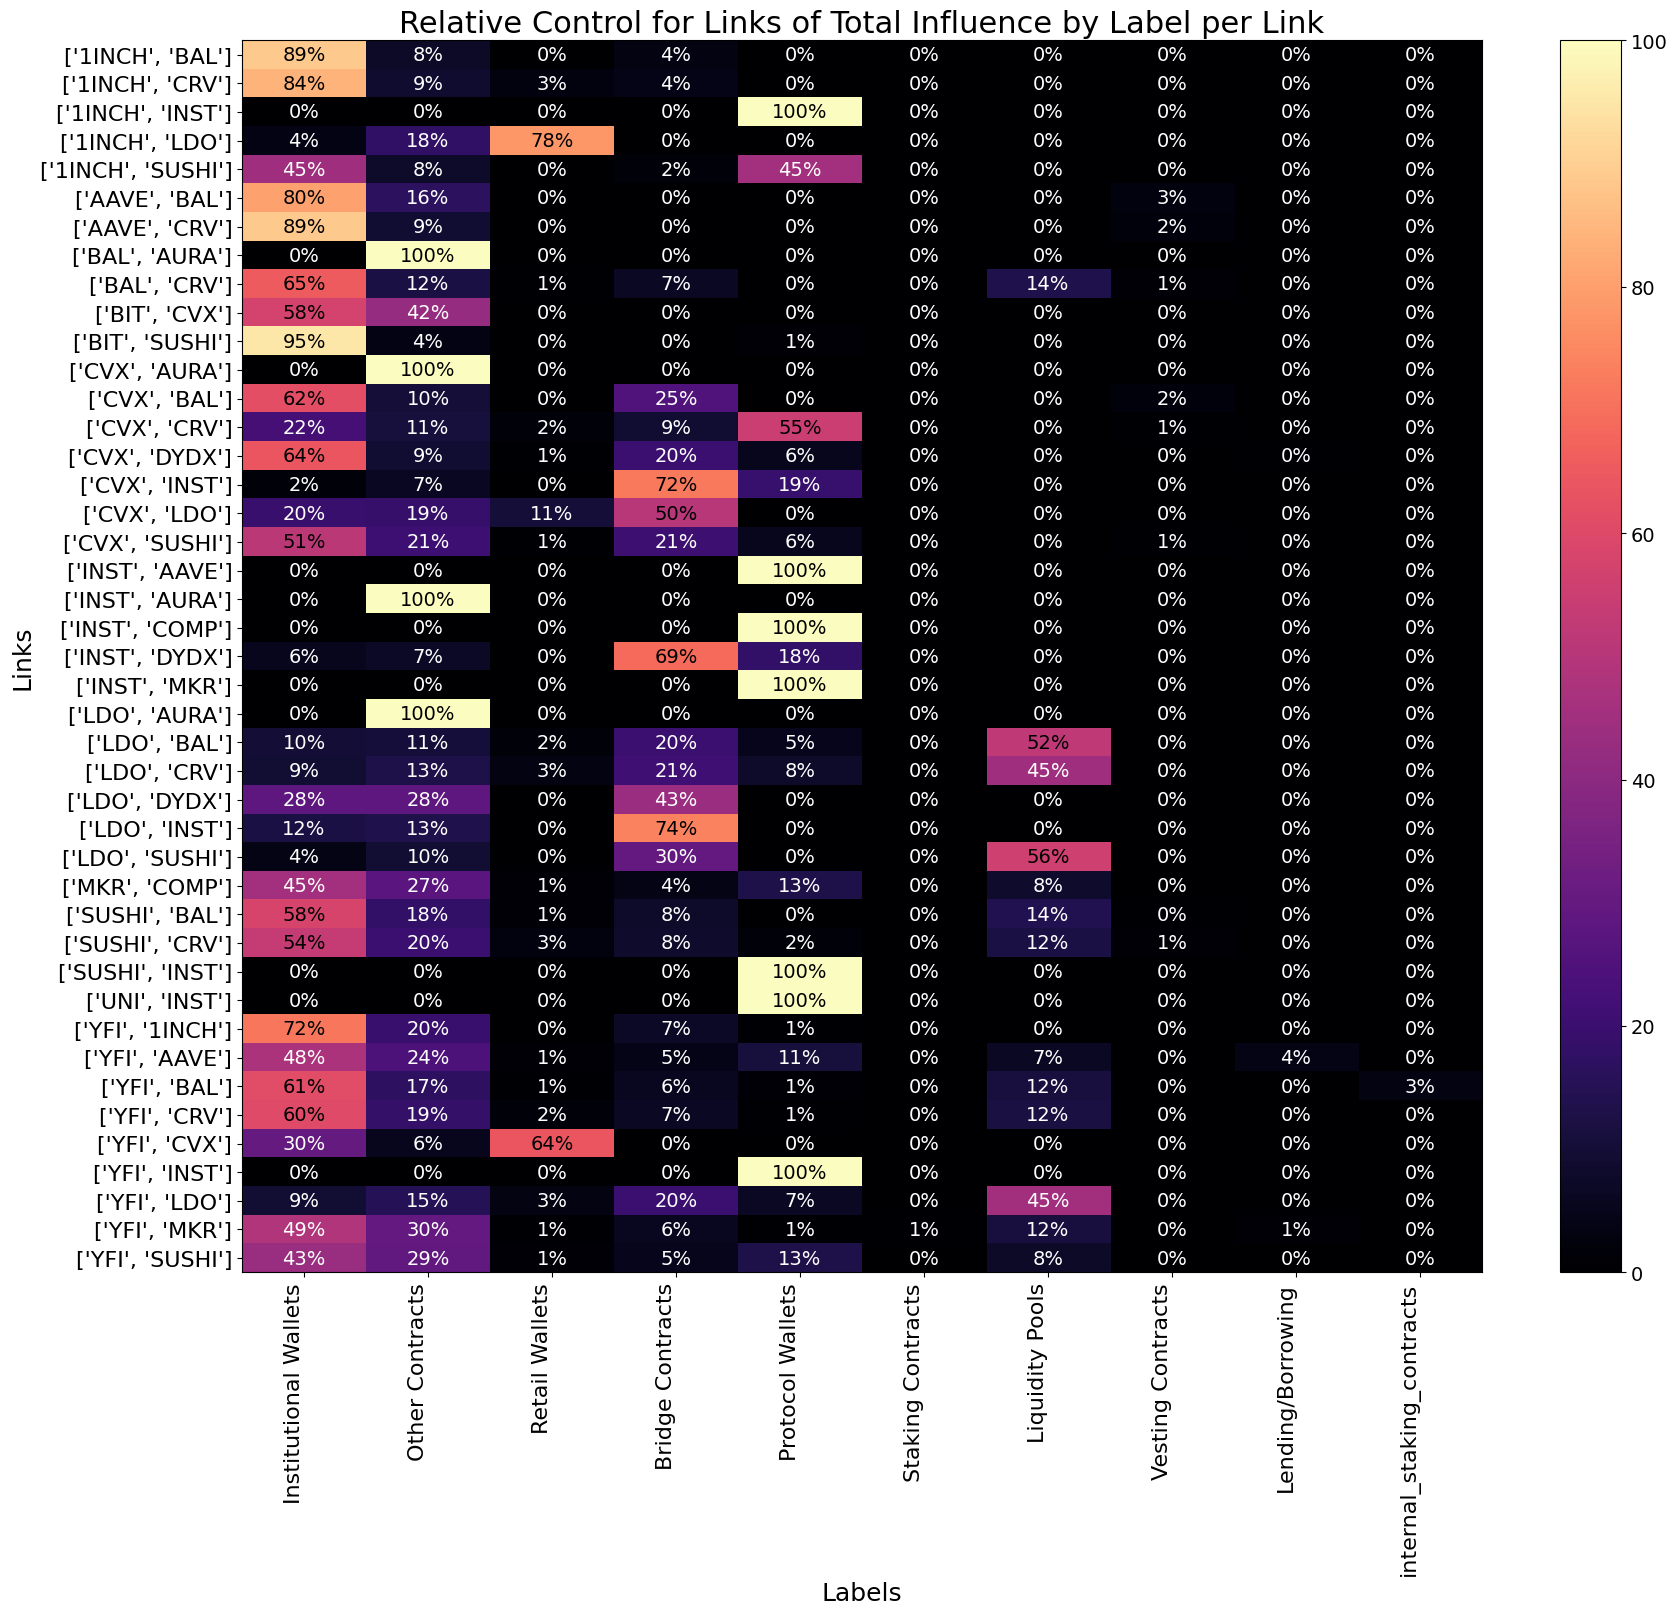

In [24]:
plot_heatmap_labels(metric_dataframes, group='sample', colormap='magma', output_path='../output/links')